In [1]:
#Nama  : Naufal raihan ramadhan
#NIM   : 1103200157
#Kelas : TK-44-G2

In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

In [3]:
#Memuat Dataset Iris
iris = load_iris()

#Membuat dataframe dari dataset Iris
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

#Menampilkan dataset
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [5]:
# Menampilkan nilai unik dalam kolom "target"
unique_targets = iris_df['target'].unique()
print("Nilai Unique dalam Kolom 'target':")
for target in unique_targets:
    print(f"  - {target}")

# Menampilkan nilai unik dalam kolom-kolom yang dimaksud
selected_columns = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'target']

for col in selected_columns:
    unique_values = iris_df[col].unique()
    print(f"Nilai Unique dalam Kolom '{col}':")
    for val in unique_values:
        print(f"  - {val}")


Nilai Unique dalam Kolom 'target':
  - 0
  - 1
  - 2
Nilai Unique dalam Kolom 'sepal length (cm)':
  - 5.1
  - 4.9
  - 4.7
  - 4.6
  - 5.0
  - 5.4
  - 4.4
  - 4.8
  - 4.3
  - 5.8
  - 5.7
  - 5.2
  - 5.5
  - 4.5
  - 5.3
  - 7.0
  - 6.4
  - 6.9
  - 6.5
  - 6.3
  - 6.6
  - 5.9
  - 6.0
  - 6.1
  - 5.6
  - 6.7
  - 6.2
  - 6.8
  - 7.1
  - 7.6
  - 7.3
  - 7.2
  - 7.7
  - 7.4
  - 7.9
Nilai Unique dalam Kolom 'sepal width (cm)':
  - 3.5
  - 3.0
  - 3.2
  - 3.1
  - 3.6
  - 3.9
  - 3.4
  - 2.9
  - 3.7
  - 4.0
  - 4.4
  - 3.8
  - 3.3
  - 4.1
  - 4.2
  - 2.3
  - 2.8
  - 2.4
  - 2.7
  - 2.0
  - 2.2
  - 2.5
  - 2.6
Nilai Unique dalam Kolom 'petal length (cm)':
  - 1.4
  - 1.3
  - 1.5
  - 1.7
  - 1.6
  - 1.1
  - 1.2
  - 1.0
  - 1.9
  - 4.7
  - 4.5
  - 4.9
  - 4.0
  - 4.6
  - 3.3
  - 3.9
  - 3.5
  - 4.2
  - 3.6
  - 4.4
  - 4.1
  - 4.8
  - 4.3
  - 5.0
  - 3.8
  - 3.7
  - 5.1
  - 3.0
  - 6.0
  - 5.9
  - 5.6
  - 5.8
  - 6.6
  - 6.3
  - 6.1
  - 5.3
  - 5.5
  - 6.7
  - 6.9
  - 5.7
  - 6.4
  - 5.4
  - 5.2
Ni

In [6]:
# Mendefinisikan kolom atribut (X)
X = iris_df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]

# Mendefinisikan kolom target (y)
y = iris_df['target']

In [7]:
# Bagi dataset menjadi data pelatihan (training data) dan data pengujian (testing data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
# Buat model Decision Tree dan latih dengan data pelatihan
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [9]:
# Prediksi target dengan menggunakan model pada data pengujian
y_pred = decision_tree.predict(X_test)

In [10]:
# Evaluasi model dengan mengukur akurasi dan menampilkan laporan klasifikasi serta matriks kebingungan
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred, target_names=iris.target_names)
confusion_mat = confusion_matrix(y_test, y_pred)

In [11]:
print(f"Akurasi Model Decision Tree: {accuracy*100:.2f}%")
print("\nLaporan Klasifikasi:\n", classification_report_result)
print("\nMatriks Kebingungan:\n", confusion_mat)

Akurasi Model Decision Tree: 100.00%

Laporan Klasifikasi:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Matriks Kebingungan:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [12]:
!pip install graphviz
!pip install pydotplus

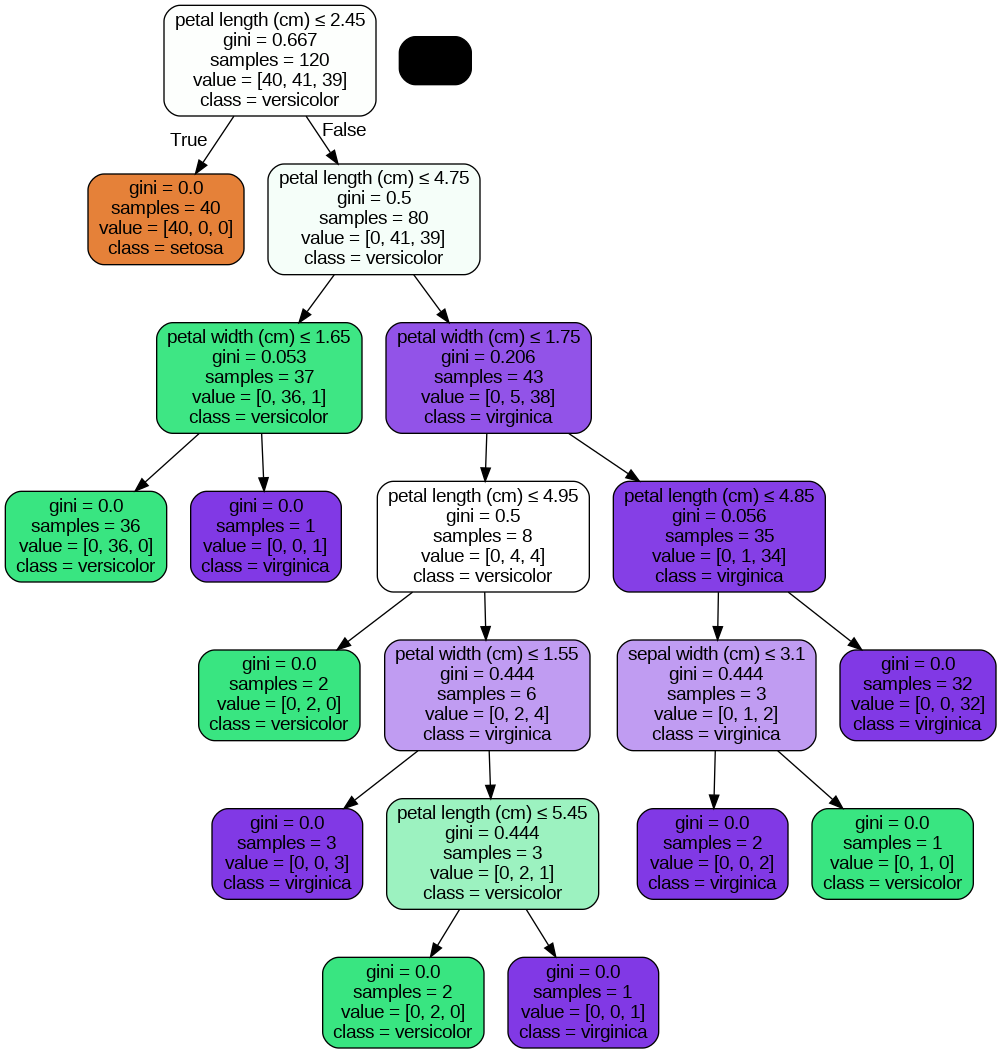

In [13]:
# Membuat grafik Decision Tree
dot_data = export_graphviz(decision_tree, out_file=None,
                            feature_names=iris.feature_names,
                            class_names=iris.target_names,
                            filled=True, rounded=True,
                            special_characters=True)

# Membuat plot grafik Decision Tree
graph = pydotplus.graph_from_dot_data(dot_data)

# Menampilkan grafik
Image(graph.create_png())

In [ ]:
# Load dataset Iris
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

# Memisahkan dataset dengan random_state
X_train_rs, X_test_rs, y_train_rs, y_test_rs = train_test_split(iris_df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'target']], iris_df['target'], test_size=0.2, random_state=42)

X_train_no_rs, X_test_no_rs, y_train_no_rs, y_test_no_rs = train_test_split(iris_df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'target']], iris_df['target'], test_size=0.2)

# Menambahkan kolom "Pembagian" untuk membedakan dataset
X_train_rs['Pembagian'] = 'Dengan random_state'
X_test_rs['Pembagian'] = 'Dengan random_state'

X_train_no_rs['Pembagian'] = 'Tanpa random_state'
X_test_no_rs['Pembagian'] = 'Tanpa random_state'

# Menggabungkan dataset menjadi satu DataFrame
combined_df = pd.concat([X_train_rs, X_test_rs, X_train_no_rs, X_test_no_rs])

# Menampilkan DataFrame
print(combined_df)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
22                 4.6               3.6                1.0               0.2   
15                 5.7               4.4                1.5               0.4   
65                 6.7               3.1                4.4               1.4   
11                 4.8               3.4                1.6               0.2   
42                 4.4               3.2                1.3               0.2   
..                 ...               ...                ...               ...   
36                 5.5               3.5                1.3               0.2   
72                 6.3               2.5                4.9               1.5   
142                5.8               2.7                5.1               1.9   
65                 6.7               3.1                4.4               1.4   
123                6.3               2.7                4.9               1.8   

     target            Pemb